In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import src.classification_model_utilities as mlclassif_utilities

In [25]:
def get_df_statistics_model(json_models_statistics, model_names, _method='ffill', _index_column_name="index"):  
    df_statistics = None
    for index, (json_obj, name) in enumerate(zip(json_models_statistics, model_names)):
        df_aux_stats = pd.DataFrame(json_obj)
        df_aux_stats[_index_column_name] = name
        df_aux_stats.reset_index(drop=True)
        """
        df_aux_setup = pd.DataFrame(set_up)
        df_aux_setup.reset_index(drop=True)

        df_aux_stats = pd.concat([df_aux_stats, df_aux_setup], axis=1)
        df_aux_stats.fillna(method=_method, inplace=True)
        """

        if index == 0:
            df_statistics = df_aux_stats
        else:
            df_statistics = pd.concat([df_statistics, df_aux_stats])
    df_statistics.reset_index(drop=True)
    df_statistics.set_index(_index_column_name, inplace=True)
    return df_statistics.reset_index()

In [21]:
model_names = [ "bert-base-uncased", "nlpaueb/legal-bert-base-uncased", 
               "snowood1/ConfliBERT-scr-uncased", "GroNLP/hateBERT"]
models_statistics = [
    [{'epoch': 1, 'Training Loss': 0.2122794448158375, 'Training Accur.': 0.9141989188577847, 'Training Precision (macro)': 0.7172850588659349, 'Training Precision (micro)': 0.9141989188577847, 'Training Recall (macro)': 0.5925711247266997, 'Training Recall (micro)': 0.9141989188577847, 'Training F1 (macro)': 0.6111561688330946, 'Training F1 (micro)': 0.9141989188577847, 'Valid. Loss': 0.1817419600607664, 'Valid. Accur.': 0.9342105263157895, 'Valid. Precision (macro)': 0.8059944831682814, 'Valid. Precision (micro)': 0.9292787984132654, 'Valid. Recall (macro)': 0.8697007212273137, 'Valid. Recall (micro)': 0.9292787984132654, 'Valid. F1 (macro)': 0.8302652733527376, 'Valid. F1 (micro)': 0.9292787984132654, 'Training Time': '0:06:16', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.11567204494186786, 'Training Accur.': 0.9650959391532337, 'Training Precision (macro)': 0.897498777436189, 'Training Precision (micro)': 0.9650959391532337, 'Training Recall (macro)': 0.9140555281951321, 'Training Recall (micro)': 0.9650959391532337, 'Training F1 (macro)': 0.9050937581561392, 'Training F1 (micro)': 0.9650959391532337, 'Valid. Loss': 0.19277759066786976, 'Valid. Accur.': 0.9495614035087719, 'Valid. Precision (macro)': 0.8687716587142446, 'Valid. Precision (micro)': 0.9516425177989085, 'Valid. Recall (macro)': 0.8573970754944084, 'Valid. Recall (micro)': 0.9516425177989085, 'Valid. F1 (macro)': 0.8582013133563434, 'Valid. F1 (micro)': 0.9516425177989085, 'Training Time': '0:06:16', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.07614616376448277, 'Training Accur.': 0.9823094113619959, 'Training Precision (macro)': 0.956061110984694, 'Training Precision (micro)': 0.9823094113619959, 'Training Recall (macro)': 0.9445926355889338, 'Training Recall (micro)': 0.9823094113619959, 'Training F1 (macro)': 0.950193529947404, 'Training F1 (micro)': 0.9823094113619959, 'Valid. Loss': 0.26206484854092676, 'Valid. Accur.': 0.9488304093567251, 'Valid. Precision (macro)': 0.859005884926679, 'Valid. Precision (micro)': 0.9509922009428197, 'Valid. Recall (macro)': 0.8545461866970036, 'Valid. Recall (micro)': 0.9509922009428197, 'Valid. F1 (macro)': 0.855894242184244, 'Valid. F1 (micro)': 0.9509922009428197, 'Training Time': '0:06:15', 'Validation Time': '0:00:15'}],
    [{'epoch': 1, 'Training Loss': 0.23185121413667267, 'Training Accur.': 0.904066832074188, 'Training Precision (macro)': 0.7219251157194703, 'Training Precision (micro)': 0.904066832074188, 'Training Recall (macro)': 0.5976249135476426, 'Training Recall (micro)': 0.904066832074188, 'Training F1 (macro)': 0.6213057427666651, 'Training F1 (micro)': 0.904066832074188, 'Valid. Loss': 0.14123995577213927, 'Valid. Accur.': 0.9517543859649122, 'Valid. Precision (macro)': 0.8950719789476842, 'Valid. Precision (micro)': 0.9641967892169744, 'Valid. Recall (macro)': 0.9151077722981358, 'Valid. Recall (micro)': 0.9641967892169744, 'Valid. F1 (macro)': 0.9009813232202406, 'Valid. F1 (micro)': 0.9641967892169744, 'Training Time': '0:06:10', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.14675883086142585, 'Training Accur.': 0.9567362806962414, 'Training Precision (macro)': 0.8899058901312112, 'Training Precision (micro)': 0.9567362806962414, 'Training Recall (macro)': 0.8589900114641222, 'Training Recall (micro)': 0.9567362806962414, 'Training F1 (macro)': 0.8733890275721362, 'Training F1 (micro)': 0.9567362806962414, 'Valid. Loss': 0.22710861208217561, 'Valid. Accur.': 0.9378654970760234, 'Valid. Precision (macro)': 0.8051029705401461, 'Valid. Precision (micro)': 0.9368502420832722, 'Valid. Recall (macro)': 0.868073174471805, 'Valid. Recall (micro)': 0.9368502420832722, 'Valid. F1 (macro)': 0.8312791304015377, 'Valid. F1 (micro)': 0.9368502420832722, 'Training Time': '0:06:22', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.11140913584117787, 'Training Accur.': 0.9673670492223062, 'Training Precision (macro)': 0.9114501952235846, 'Training Precision (micro)': 0.9673670492223062, 'Training Recall (macro)': 0.9024604279588991, 'Training Recall (micro)': 0.9673670492223062, 'Training F1 (macro)': 0.9058712387834394, 'Training F1 (micro)': 0.9673670492223062, 'Valid. Loss': 0.23923018716761776, 'Valid. Accur.': 0.9400584795321638, 'Valid. Precision (macro)': 0.8422792930376022, 'Valid. Precision (micro)': 0.9496306778095904, 'Valid. Recall (macro)': 0.8798014956146681, 'Valid. Recall (micro)': 0.9496306778095904, 'Valid. F1 (macro)': 0.8578431146073775, 'Valid. F1 (micro)': 0.9496306778095904, 'Training Time': '0:06:21', 'Validation Time': '0:00:15'}],
    [{'epoch': 1, 'Training Loss': 0.23465055294435325, 'Training Accur.': 0.9001345318544047, 'Training Precision (macro)': 0.7198824006625977, 'Training Precision (micro)': 0.9001345318544047, 'Training Recall (macro)': 0.624354756072097, 'Training Recall (micro)': 0.9001345318544047, 'Training F1 (macro)': 0.6495040705469467, 'Training F1 (micro)': 0.9001345318544047, 'Valid. Loss': 0.17521181136263503, 'Valid. Accur.': 0.956140350877193, 'Valid. Precision (macro)': 0.916384869417118, 'Valid. Precision (micro)': 0.9650725527824913, 'Valid. Recall (macro)': 0.8853907018901939, 'Valid. Recall (micro)': 0.9650725527824913, 'Valid. F1 (macro)': 0.8980968757297835, 'Valid. F1 (micro)': 0.9650725527824913, 'Training Time': '0:06:06', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.15224081638603534, 'Training Accur.': 0.9590626266370716, 'Training Precision (macro)': 0.9004095418183232, 'Training Precision (micro)': 0.9590626266370716, 'Training Recall (macro)': 0.8689990072076682, 'Training Recall (micro)': 0.9590626266370716, 'Training F1 (macro)': 0.8837213266249819, 'Training F1 (micro)': 0.9590626266370716, 'Valid. Loss': 0.18255704181195287, 'Valid. Accur.': 0.9473684210526315, 'Valid. Precision (macro)': 0.8756291920544804, 'Valid. Precision (micro)': 0.9392398953689929, 'Valid. Recall (macro)': 0.8315887808094948, 'Valid. Recall (micro)': 0.9392398953689929, 'Valid. F1 (macro)': 0.8494563889470921, 'Valid. F1 (micro)': 0.9392398953689929, 'Training Time': '0:06:21', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.11293711365202291, 'Training Accur.': 0.9688827595648952, 'Training Precision (macro)': 0.9253773459379802, 'Training Precision (micro)': 0.9688827595648952, 'Training Recall (macro)': 0.9034017253632517, 'Training Recall (micro)': 0.9688827595648952, 'Training F1 (macro)': 0.9134752021940167, 'Training F1 (micro)': 0.9688827595648952, 'Valid. Loss': 0.20870899599966625, 'Valid. Accur.': 0.956140350877193, 'Valid. Precision (macro)': 0.9104671767771433, 'Valid. Precision (micro)': 0.9497745261383271, 'Valid. Recall (macro)': 0.8015457872828018, 'Valid. Recall (micro)': 0.9497745261383271, 'Valid. F1 (macro)': 0.8412311932100206, 'Valid. F1 (micro)': 0.9497745261383271, 'Training Time': '0:06:22', 'Validation Time': '0:00:15'}],
    [{'epoch': 1, 'Training Loss': 0.22123441991953216, 'Training Accur.': 0.8757590202077423, 'Training Precision (macro)': 0.6725498081058963, 'Training Precision (micro)': 0.8757590202077423, 'Training Recall (macro)': 0.6079426233527244, 'Training Recall (micro)': 0.8757590202077423, 'Training F1 (macro)': 0.6249794334689623, 'Training F1 (micro)': 0.8757590202077423, 'Valid. Loss': 0.16827689219070108, 'Valid. Accur.': 0.9451754385964912, 'Valid. Precision (macro)': 0.8698047016723492, 'Valid. Precision (micro)': 0.9314007014510678, 'Valid. Recall (macro)': 0.7320499341042167, 'Valid. Recall (micro)': 0.9314007014510678, 'Valid. F1 (macro)': 0.776928685823096, 'Valid. F1 (micro)': 0.9314007014510678, 'Training Time': '0:06:23', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.12404870089832876, 'Training Accur.': 0.9625202913816975, 'Training Precision (macro)': 0.913014582400728, 'Training Precision (micro)': 0.9625202913816975, 'Training Recall (macro)': 0.8799955385472865, 'Training Recall (micro)': 0.9625202913816975, 'Training F1 (macro)': 0.8949895245931199, 'Training F1 (micro)': 0.9625202913816975, 'Valid. Loss': 0.1849009170658527, 'Valid. Accur.': 0.9473684210526315, 'Valid. Precision (macro)': 0.946249756726747, 'Valid. Precision (micro)': 0.9548707914880511, 'Valid. Recall (macro)': 0.7810219233602684, 'Valid. Recall (micro)': 0.9548707914880511, 'Valid. F1 (macro)': 0.8358734673615701, 'Valid. F1 (micro)': 0.9548707914880511, 'Training Time': '0:06:23', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.06940825742511901, 'Training Accur.': 0.9823087287186587, 'Training Precision (macro)': 0.963587489272827, 'Training Precision (micro)': 0.9823087287186587, 'Training Recall (macro)': 0.9346550456631998, 'Training Recall (micro)': 0.9823087287186587, 'Training F1 (macro)': 0.9484804073019739, 'Training F1 (micro)': 0.9823087287186587, 'Valid. Loss': 0.22868706325167104, 'Valid. Accur.': 0.9517543859649122, 'Valid. Precision (macro)': 0.8868105612155808, 'Valid. Precision (micro)': 0.9617523052727038, 'Valid. Recall (macro)': 0.8907602383902232, 'Valid. Recall (micro)': 0.9617523052727038, 'Valid. F1 (macro)': 0.8829616307137302, 'Valid. F1 (micro)': 0.9617523052727038, 'Training Time': '0:06:22', 'Validation Time': '0:00:15'}]
]

In [26]:
df_statistics = get_df_statistics_model(models_statistics, model_names)
df_statistics

,index,epoch,Training Loss,Training Accur.,Training Precision (macro),Training Precision (micro),Training Recall (macro),Training Recall (micro),Training F1 (macro),Training F1 (micro),Valid. Loss,Valid. Accur.,Valid. Precision (macro),Valid. Precision (micro),Valid. Recall (macro),Valid. Recall (micro),Valid. F1 (macro),Valid. F1 (micro),Training Time,Validation Time
0,bert-base-uncased,1,0.212279,0.914199,0.717285,0.914199,0.592571,0.914199,0.611156,0.914199,0.181742,0.934211,0.805994,0.929279,0.869701,0.929279,0.830265,0.929279,0:06:16,0:00:15
1,bert-base-uncased,2,0.115672,0.965096,0.897499,0.965096,0.914056,0.965096,0.905094,0.965096,0.192778,0.949561,0.868772,0.951643,0.857397,0.951643,0.858201,0.951643,0:06:16,0:00:15
2,bert-base-uncased,3,0.076146,0.982309,0.956061,0.982309,0.944593,0.982309,0.950194,0.982309,0.262065,0.948830,0.859006,0.950992,0.854546,0.950992,0.855894,0.950992,0:06:15,0:00:15
3,nlpaueb/legal-bert-base-uncased,1,0.231851,0.904067,0.721925,0.904067,0.597625,0.904067,0.621306,0.904067,0.141240,0.951754,0.895072,0.964197,0.915108,0.964197,0.900981,0.964197,0:06:10,0:00:15
4,nlpaueb/legal-bert-base-uncased,2,0.146759,0.956736,0.889906,0.956736,0.858990,0.956736,0.873389,0.956736,0.227109,0.937865,0.805103,0.936850,0.868073,0.936850,0.831279,0.936850,0:06:22,0:00:15
5,nlpaueb/legal-bert-base-uncased,3,0.111409,0.967367,0.911450,0.967367,0.902460,0.967367,0.905871,0.967367,0.239230,0.940058,0.842279,0.949631,0.879801,0.949631,0.857843,0.949631,0:06:21,0:00:15
6,snowood1/ConfliBERT-scr-uncased,1,0.234651,0.900135,0.719882,0.900135,0.624355,0.900135,0.649504,0.900135,0.175212,0.956140,0.916385,0.965073,0.885391,0.965073,0.898097,0.965073,0:06:06,0:00:15
7,snowood1/ConfliBERT-scr-uncased,2,0.152241,0.959063,0.900410,0.959063,0.868999,0.959063,0.883721,0.959063,0.182557,0.947368,0.875629,0.939240,0.831589,0.939240,0.849456,0.939240,0:06:21,0:00:15
8,snowood1/ConfliBERT-scr-uncased,3,0.112937,0.968883,0.925377,0.968883,0.903402,0.968883,0.913475,0.968883,0.208709,0.956140,0.910467,0.949775,0.801546,0.949775,0.841231,0.949775,0:06:22,0:00:15
9,GroNLP/hateBERT,1,0.221234,0.875759,0.672550,0.875759,0.607943,0.875759,0.624979,0.875759,0.168277,0.945175,0.869805,0.931401,0.732050,0.931401,0.776929,0.931401,0:06:23,0:00:15


In [49]:
def draw_statistics_of_models(df, columns_of_interest, epoch=None, _index=None, size_x=15, size_y=10, _dpi=80, _loc="best",
                               withLabelsInPlot=False, _title="", showPlot=True, showScatter=True):
  fig = plt.figure(figsize=(size_x, size_y), dpi=_dpi)

  for i_index, model_name in enumerate(df["index"].unique()):
    for i_column, column_name in enumerate(columns_of_interest):
      df_aux = df[df["index"] == model_name][column_name]
    
      if showPlot == False and showScatter == False:
        plt.plot(np.arange(len(df_aux)), df_aux)
        plt.scatter(np.arange(len(df_aux)), df_aux)
      elif showPlot == False:
        plt.scatter(np.arange(len(df_aux)), df_aux)
      elif showScatter == False:
        plt.plot(np.arange(len(df_aux)), df_aux)
      else:
        plt.plot(np.arange(len(df_aux)), df_aux)

      if withLabelsInPlot == True:
        for x, y in zip(np.arange(len(df_aux)), list(df_aux)):
          plt.text(x, y, str(round(y, 4)))
  plt.title(_title)
  plt.legend(df["index"].unique(), loc=_loc)

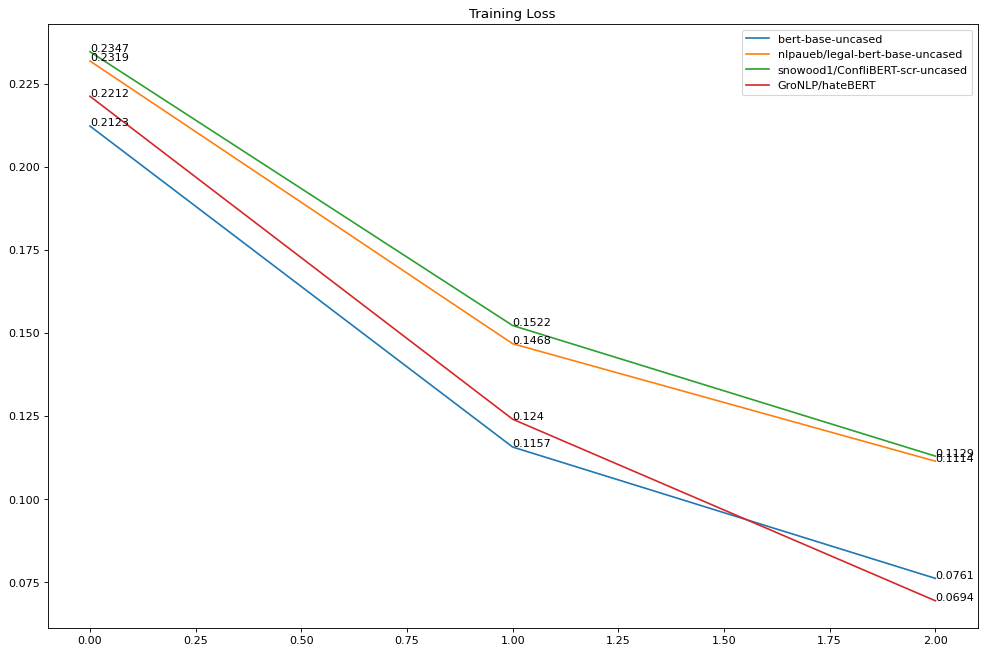

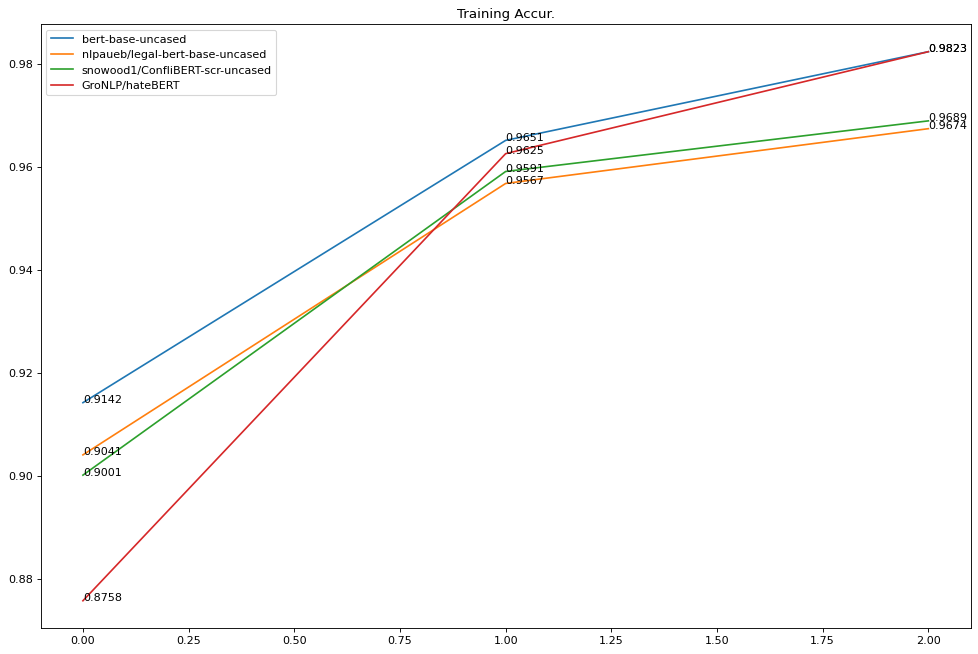

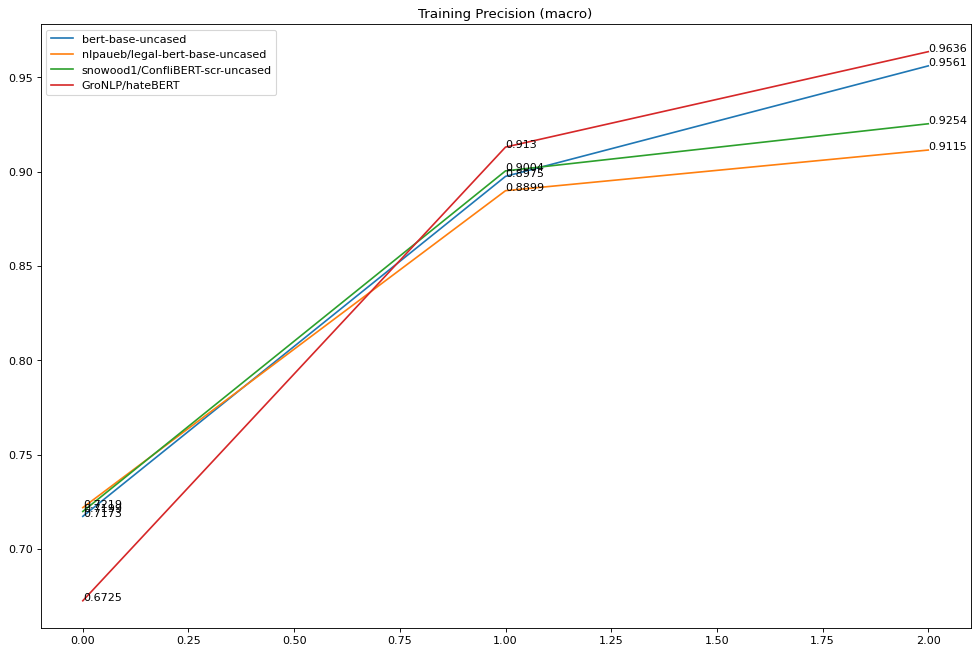

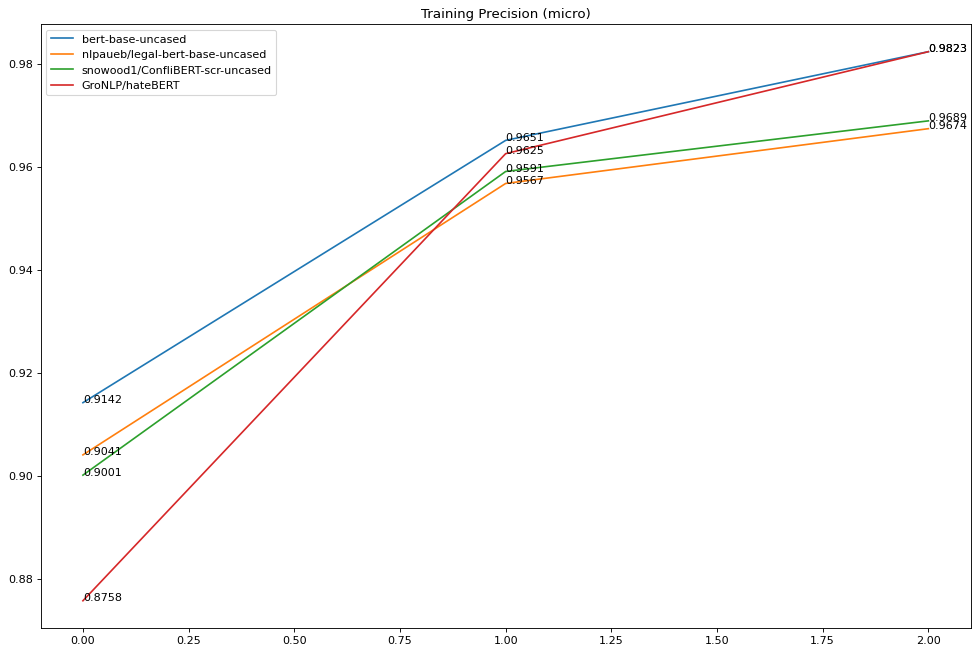

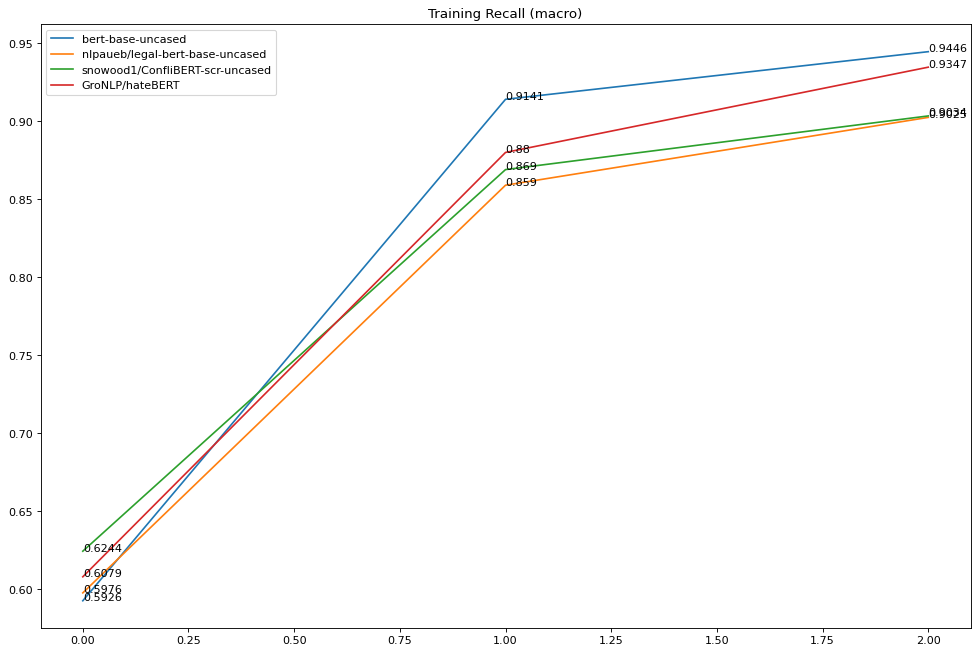

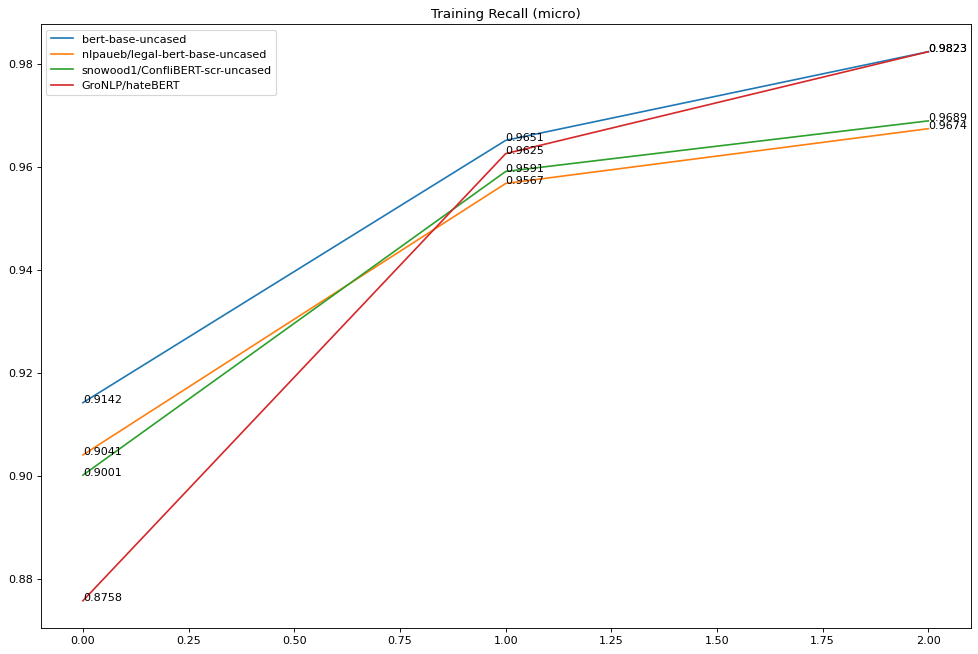

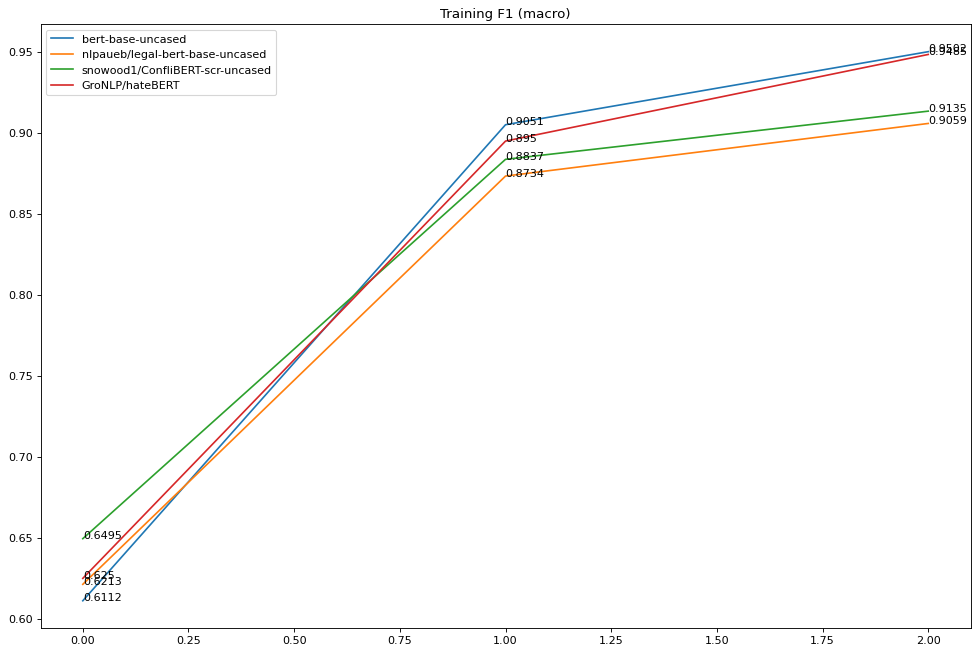

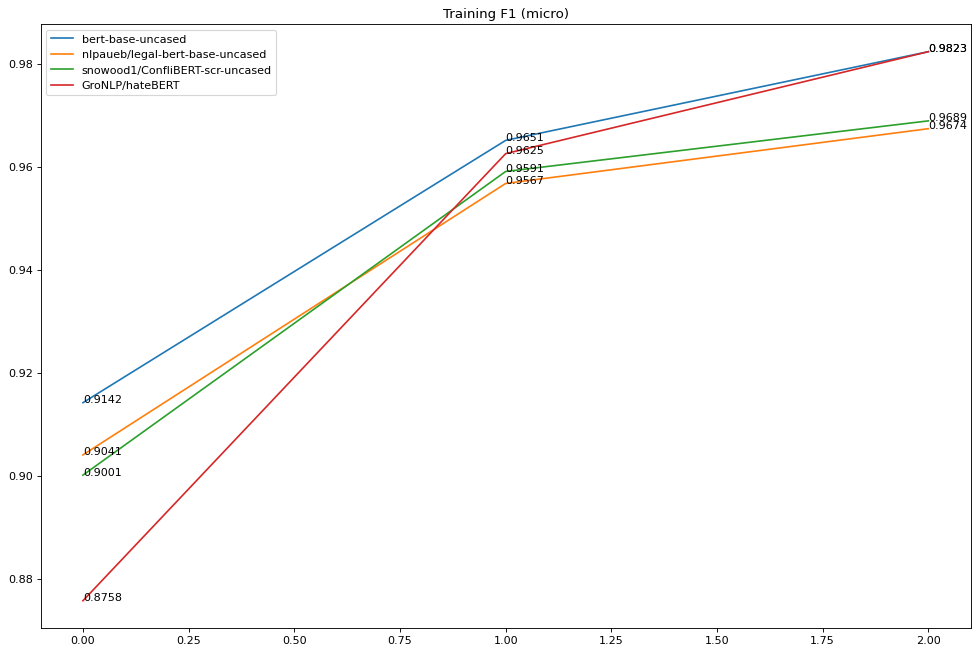

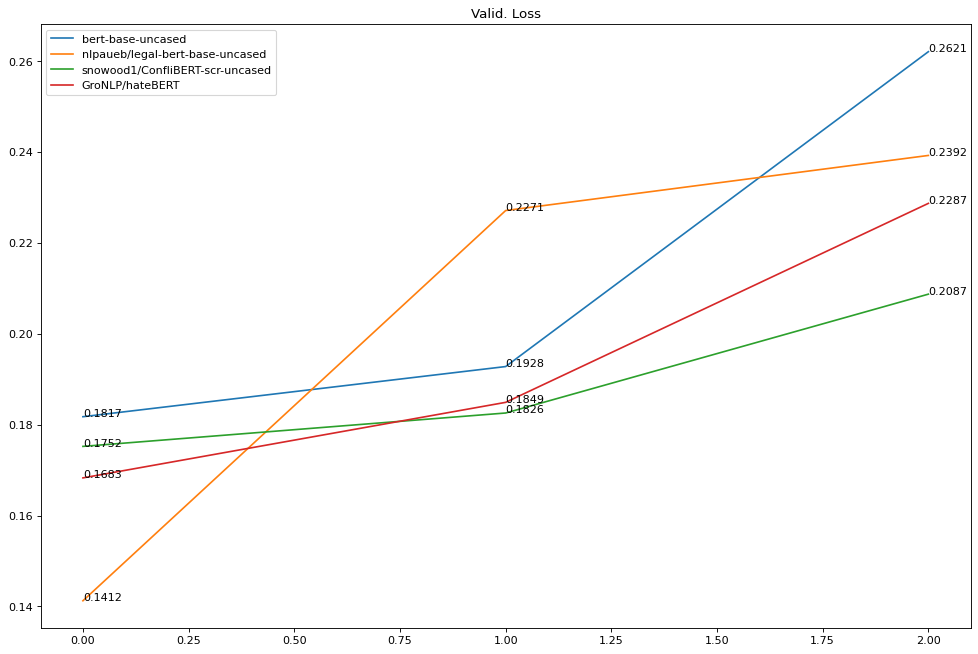

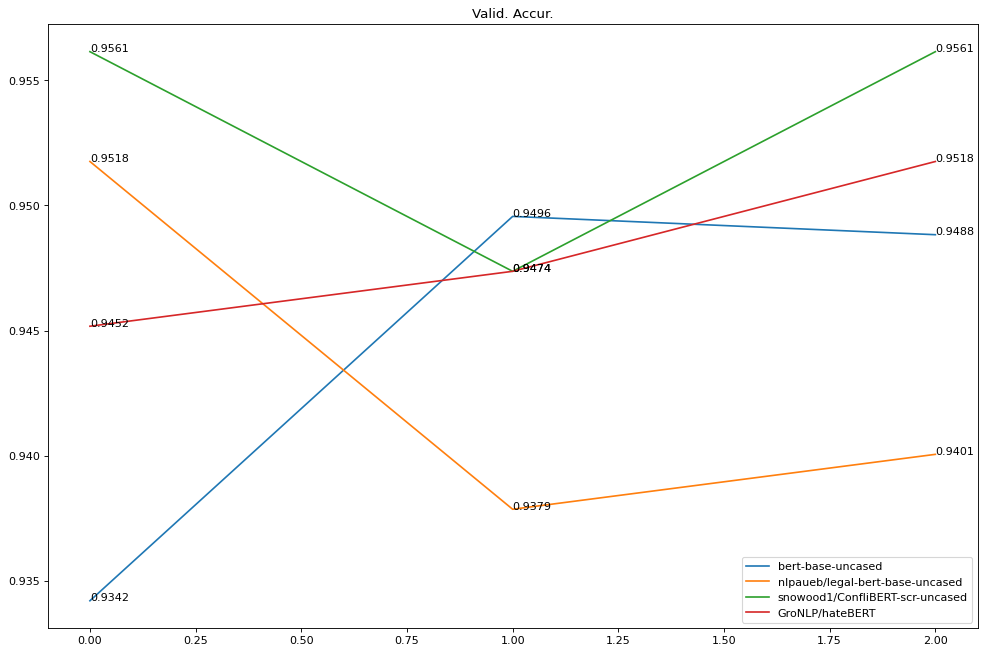

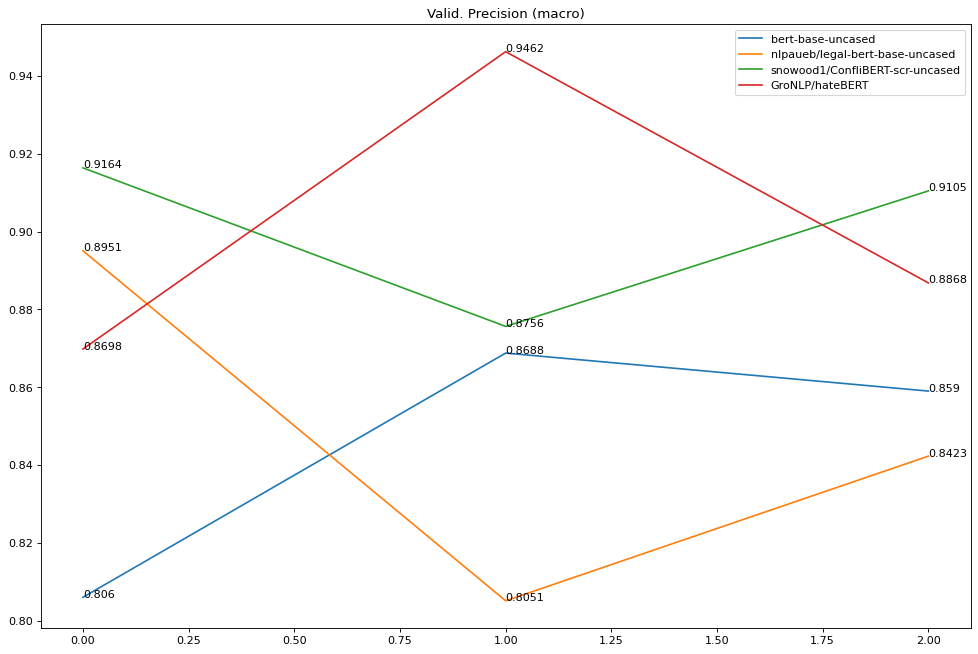

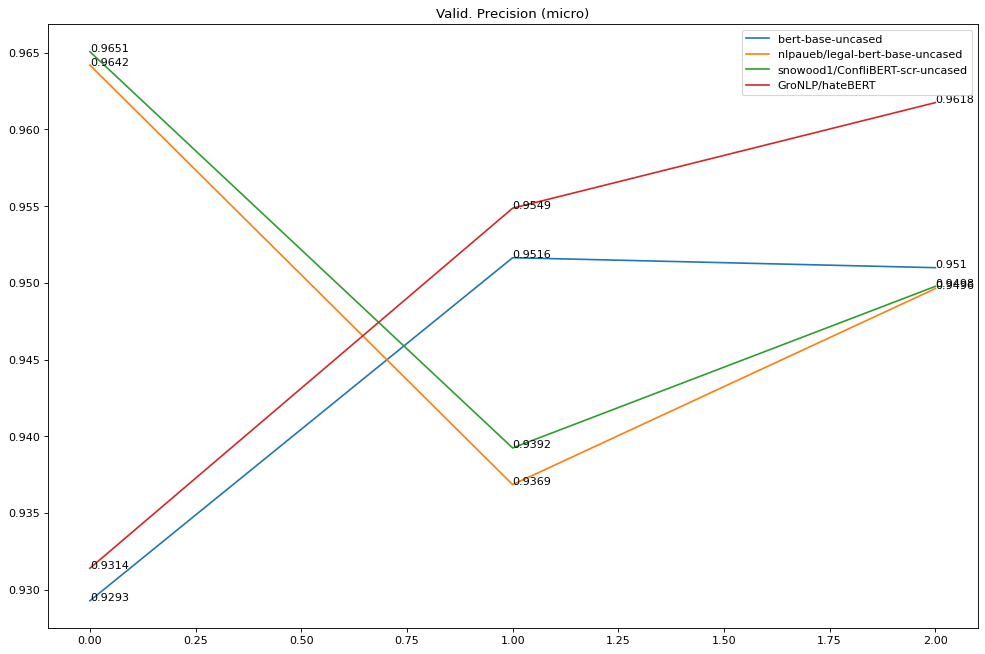

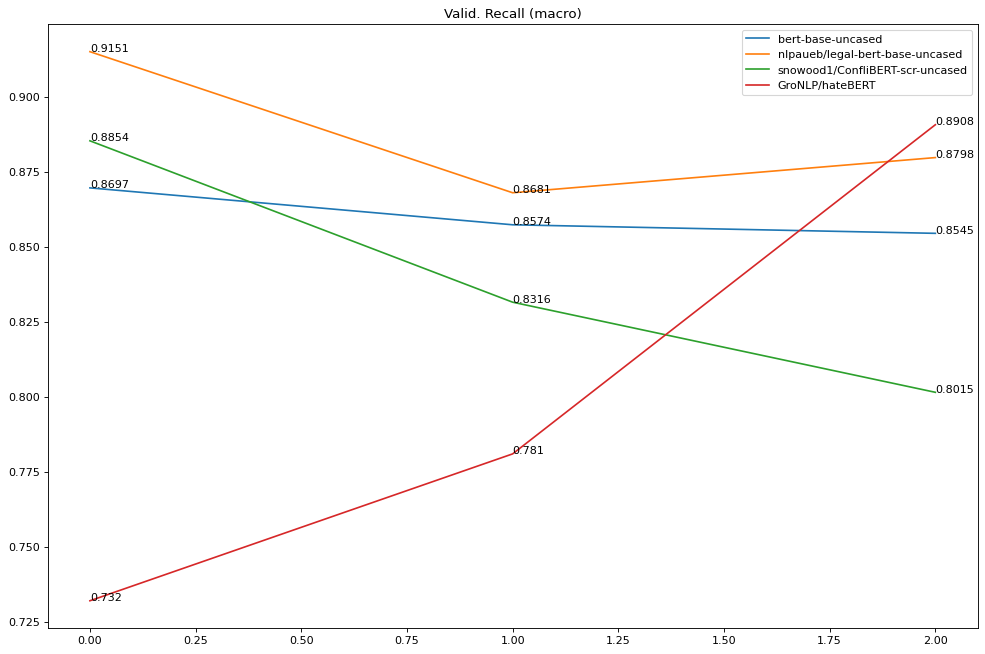

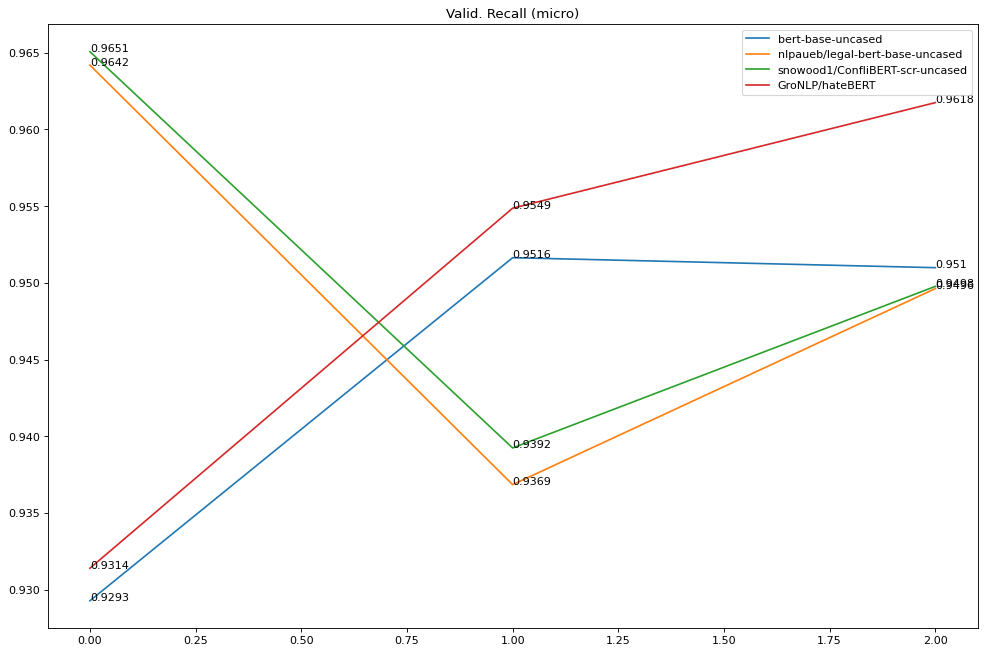

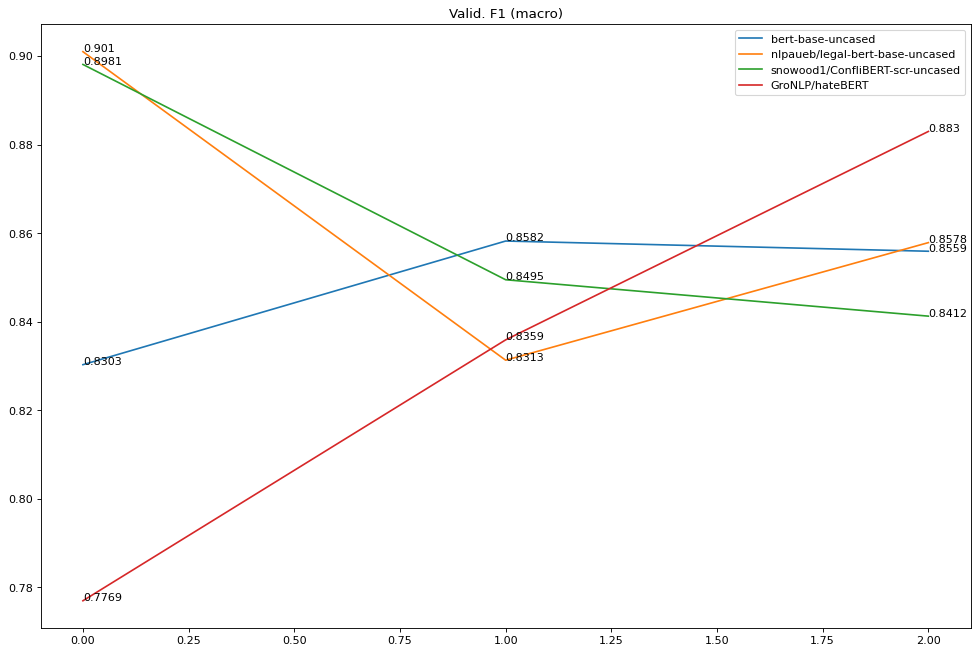

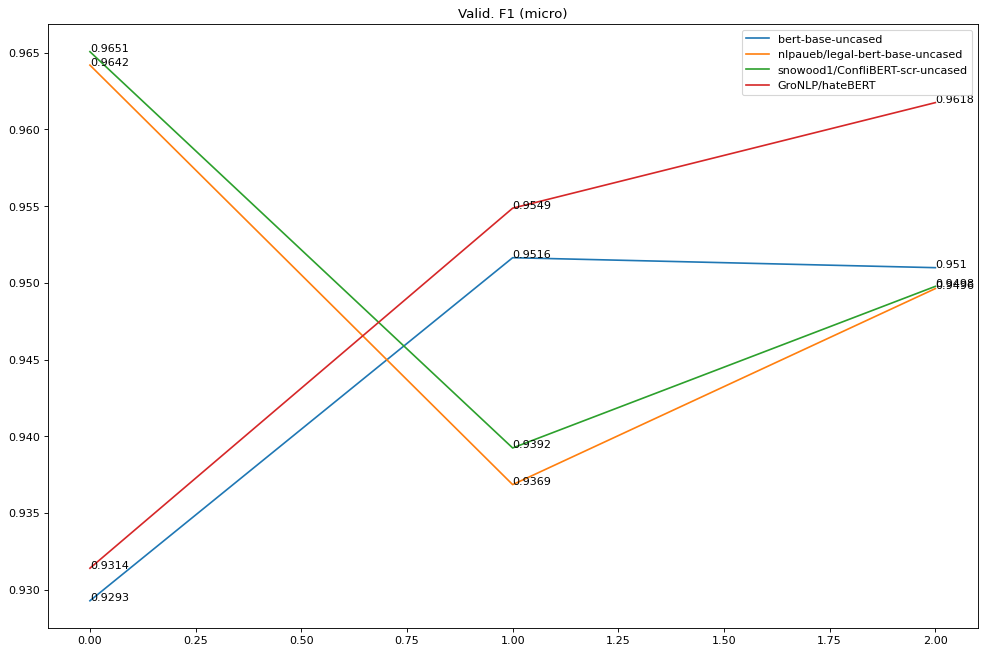

In [51]:
columns = ["Training Loss",	"Training Accur.",	"Training Precision (macro)",	"Training Precision (micro)",	"Training Recall (macro)",	"Training Recall (micro)",	"Training F1 (macro)",	"Training F1 (micro)",	"Valid. Loss",	"Valid. Accur.",	"Valid. Precision (macro)",	"Valid. Precision (micro)",	"Valid. Recall (macro)",	"Valid. Recall (micro)",	"Valid. F1 (macro)",	"Valid. F1 (micro)"]
for col in columns:
  draw_statistics_of_models(df_statistics, [col], withLabelsInPlot=True, showPlot=True, showScatter=True, _title=col)